# MNIST com Keras

Resolveremos agora o mesmo problema utilizando diferentes bibliotecas, apenas Numpy; Keras; Tensorflow e Pytorch. A ideia, aqui, é que você tenha uma experiência com cada uma delas para aí poder saber diferencias quando utilizar cada uma na melhor situação.



In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 137s 12us/step


# Alguns exemplos de imagens

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : 7')

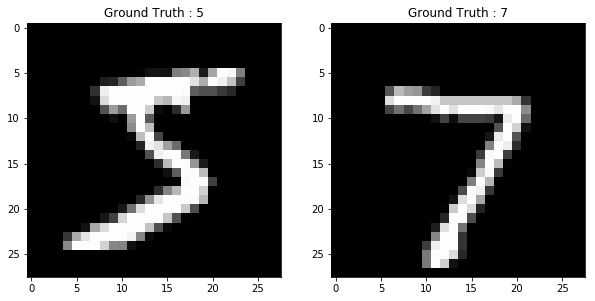

In [4]:
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

# Pré processamento dos dados
-  Converta cada imagem em uma matriz (28x28) em um array de 784 dimensõesConvert each image matrix ( 28×28 ) to an array ( 28*28 = 784 dimenstional )

In [5]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

- Normalize os dados

In [6]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

- Use One-Hot-Encoding

In [8]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


# Construindo nossa Rede Neural


In [43]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

## Compilando o modelo

In [44]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Treinamento

In [45]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.2734 - acc: 0.9148 - val_loss: 0.1154 - val_acc: 0.9639
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0934 - acc: 0.9713 - val_loss: 0.0854 - val_acc: 0.9722
Epoch 3/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0591 - acc: 0.9813 - val_loss: 0.1128 - val_acc: 0.9645
Epoch 4/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0406 - acc: 0.9870 - val_loss: 0.0666 - val_acc: 0.9803
Epoch 5/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0291 - acc: 0.9909 - val_loss: 0.0780 - val_acc: 0.9782
Epoch 6/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0216 - acc: 0.9929 - val_loss: 0.0697 - val_acc: 0.9820
Epoch 7/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0171 - acc: 0.9945 - val_loss: 0.1004 - val_acc

## Avaliação

Text(0.5,1,'Accuracy Curves')

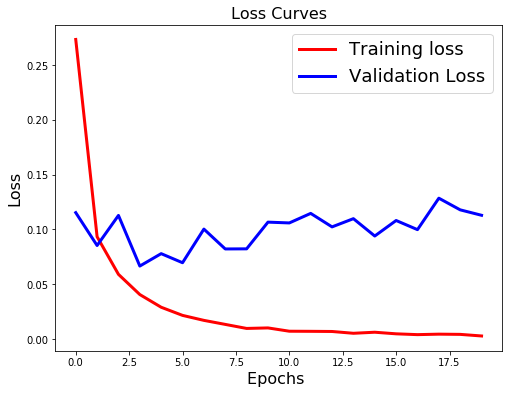

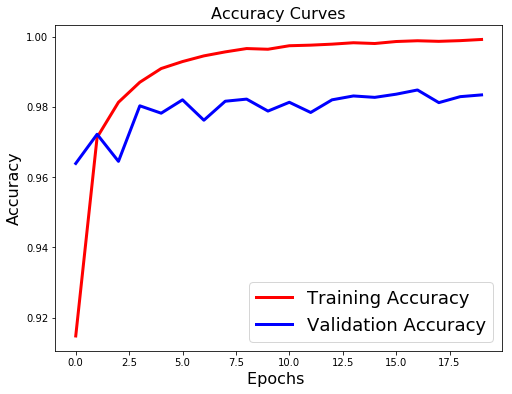

In [46]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## Overfitting e Regularização

Temos um caso claro de Overfitting. Para combater, aplicaremos **dropout**

In [37]:
from keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(10, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(10, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 28us/step - loss: 2.0035 - acc: 0.2597 - val_loss: 1.5447 - val_acc: 0.6288
Epoch 2/20
60000/60000 [==============================] - 1s 21us/step - loss: 1.7483 - acc: 0.3540 - val_loss: 1.2844 - val_acc: 0.7227
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 1.6409 - acc: 0.3853 - val_loss: 1.1405 - val_acc: 0.7417
Epoch 4/20
60000/60000 [==============================] - 1s 20us/step - loss: 1.5900 - acc: 0.4008 - val_loss: 1.0513 - val_acc: 0.7484
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 1.5615 - acc: 0.4120 - val_loss: 1.0174 - val_acc: 0.7582
Epoch 6/20
60000/60000 [==============================] - 1s 20us/step - loss: 1.5433 - acc: 0.4213 - val_loss: 0.9838 - val_acc: 0.7606
Epoch 7/20
60000/60000 [==============================] - 1s 20us/step - loss: 1.5379 - acc: 0.4230 - val_loss: 0.9920 - val_acc

Text(0.5,1,'Accuracy Curves')

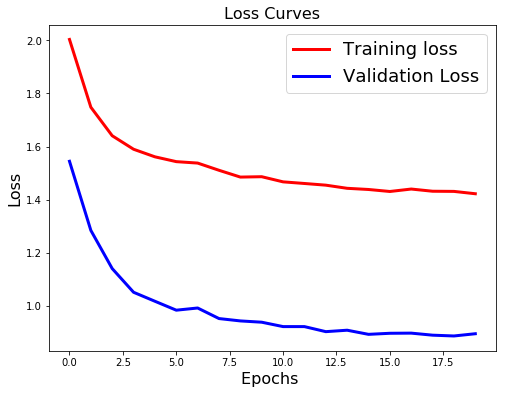

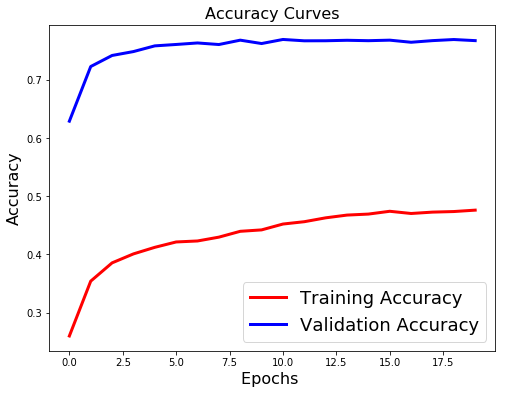

In [38]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))
 
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Vocês conseguem fazer melhor?

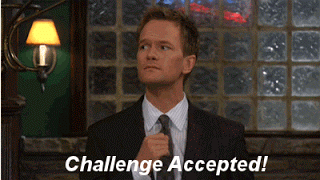

In [ ]:
##SEU CODIGO AQUI